# Maximum likelihood estimator

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
#plt.rcParams['font.size'] = '10'

## Data model - DC Level in Gaussian noise ($\sigma^2=A$)
Consider $x[n] = A + w[n]$ for $n=0,1,\dots,N-1$ where $w[n]\sim\mathcal{N}(0,A)$. <br>
The PDF of $\mathbf{x}$ is given by
$$p(\mathbf{x},A) = \frac{1}{(2\pi A)^{N/2}} \exp\left[ -\frac{1}{2A}\sum_{n=0}^{N-1}(x[n]-A)^2 \right].$$ <br>
The maximum likelihood estimator is <br>
$$\hat{A} = -\frac{1}{2} + \sqrt{\frac{1}{N}\sum_{n=0}^{N-1}x^2[n]+\frac{1}{4}}.$$
The Cramer-Rao lower bound is
$$\mathrm{var}(\hat{A})\ge\frac{A^2}{N(A+\frac{1}{2})}.$$

In [70]:
# DC level in Gaussiann model (variant)
A = 1
N = 200
M = 10000

# Noise
sigma = np.sqrt(A)

AML = np.zeros((N,M))
for n in range(N):
    for m in range(M):
        w = np.random.randn(n+1)
        x = A + w
        AML[n,m] = -1/2 + np.sqrt(np.mean(x**2)+1/4)
    
AML_mean = np.mean(AML,axis=1)
AML_var = np.var(AML,axis=1)


Text(0, 0.5, '$\\hat{A}$')

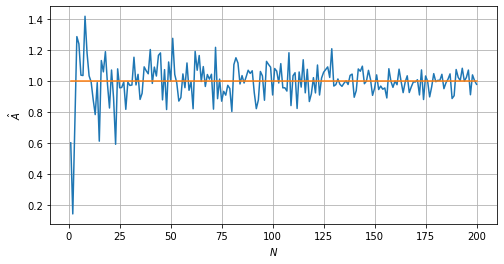

In [75]:
# Plotting 1
plt.figure(figsize=[8,4])
n = np.arange(N)+1
plt.plot(n,AML[:,0])
plt.plot([1,N],[A,A])
plt.grid('on')
plt.xlabel('$N$')
plt.ylabel('$\hat{A}$')

Text(0, 0.5, '$\\mathrm{mean}(\\hat{A})$')

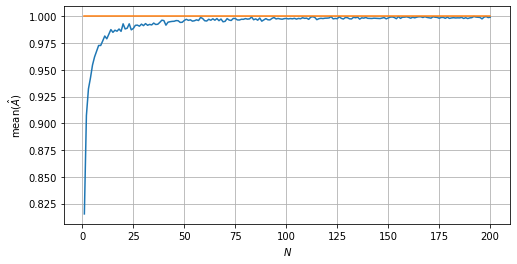

In [76]:
# Plotting mean of estimator
plt.figure(figsize=[8,4])
n = np.arange(N)+1
plt.plot(n,AML_mean)
plt.plot([1,N],[A,A])
plt.grid('on')
plt.xlabel('$N$')
plt.ylabel('$\mathrm{mean}(\hat{A})$')


Text(0, 0.5, '$N\\mathrm{var}(\\hat{A})$')

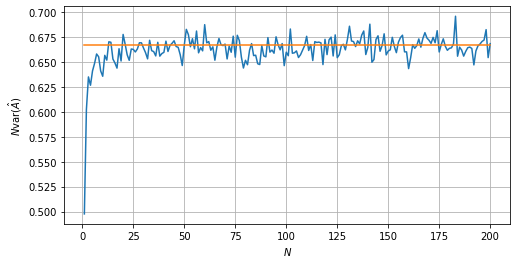

In [77]:
# Plotting variance of estimator
var0 = A**2/(A+1/2)
plt.figure(figsize=[8,4])
n = np.arange(N)+1
plt.plot(n,n*AML_var)
plt.plot([1,N],[var0,var0])
plt.grid('on')
plt.xlabel('$N$')
plt.ylabel('$N\mathrm{var}(\hat{A})$')

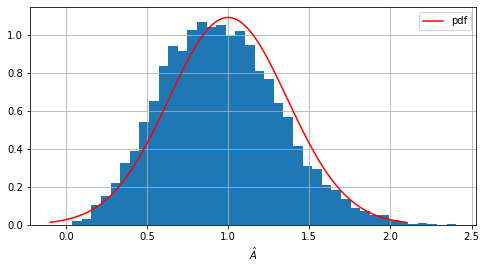

In [84]:
# Plotting some histograms
plt.figure(figsize=[8,4])
N1 = 2
sig0 = A/np.sqrt(N1*(A+1/2))

a = np.linspace(A-3*sig0,A+3*sig0,100)
pdf = stats.norm.pdf((a-A)/sig0)/sig0

plt.hist(AML[N1-1,:],bins=40,density=True)
plt.plot(a,pdf,'r')
plt.grid('on')
plt.xlabel('$\hat{A}$')
plt.legend(['pdf'])